# Compare Spectrums ipynb

This python notebook was prepared in 22.07.2023 by Fatih Bahri AYDIN (https://github.com/fatihbahri), a graduate student from Gebze Technical University, within the scope of NOWADS project.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

This code get result excel files from result_loc directory and create a dataframe. And the codes below compares spectrums in different locations. Also show and save them in charts.

file_nb will be the number of model, with for loop you can get all of the model results. model_nb will be the number of model. There are 4 different model type in this project. Those are 0 = "Default", 1 = "Default_TRIAD", 2 = "No_Dissipation", 3 = "No_Dissipation_TRIAD" respectively.

show_Charts methods show (or also save) the charts of spectrum comparisons.

To save charts, change the plots_save_dir and use show_Charts(save=True) method below.

In [2]:
plots_save_dir = r"C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik Üniversitesi\Tez\Proje\Dissipation Projects\11 - Herbers et al. (2006) - (DUCK94)\IPYNBs\EDC\Plots2"

In [3]:
file_nb = 0
model_nb = 0

In [4]:
models = ["Default", "Default_TRIAD", "No_Dissipation", "No_Dissipation_TRIAD"]

In [5]:
result_loc = r"C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik Üniversitesi\Tez\Proje\DUCK94 SWAN Models OLD version\11_models"

In [ ]:
range_value = len(os.listdir(result_loc))

In [39]:
class SpC(object):
    def __init__(self, result_loc, models, file_nb, model_nb):
        self.result_loc = result_loc
        self.models = models
        self.file_nb = file_nb
        self.model_nb = model_nb
        self.model = os.listdir(self.result_loc)[self.file_nb]
        self.date = self.model[-8:]
        self.plots_save_dir = plots_save_dir
    def model_name(self):
        return self.model
    def date_(self):
        return self.date
    def create_SWAN_df(self):
        os.chdir(self.result_loc + "/" + self.model)
        self.df = pd.read_excel(self.date +"_" + self.models[self.model_nb] + "_Model_Results.xlsx", header=1)
        self.SWAN = self.df.iloc[11:51, 3:4]
        self.SWAN.rename(columns = {'Unnamed: 3':'Frequency (Hz)'}, inplace = True)
        self.SWAN.reset_index(inplace=True, drop=True)
        for i in range(4,19):
            self.location_dens = self.df.iloc[11:51, i:i+1]
            self.location_dens.reset_index(inplace=True, drop=True)
            self.location_dens.columns = [self.location_dens.iloc[0:1, :].values.flatten()[0]]
            self.SWAN = pd.concat([self.SWAN, self.location_dens], axis=1)
        self.SWAN.dropna(axis=1, thresh=2, inplace=True)
        self.SWAN_Dens = self.SWAN.iloc[:, 1:]
        self.SWAN_Dens.columns = pd.MultiIndex.from_product([["Density (m^2/Hz)"], self.SWAN_Dens.columns])
        self.SWAN = self.SWAN.iloc[:, :1]
        self.SWAN.columns = pd.MultiIndex.from_product([["Frequency (Hz)"], self.SWAN.columns])
        self.SWAN = pd.concat([self.SWAN, self.SWAN_Dens], axis=1)
        self.SWAN.drop(index=self.SWAN.index[0], axis=0, inplace=True)
        self.SWAN.dropna(axis=1, thresh=2)
        self.SWAN.reset_index(drop=True, inplace=True)
        return self.SWAN
    def create_MEAS_df(self):
        os.chdir(self.result_loc + "/" + self.model)
        self.df = pd.read_excel(self.date +"_" + self.models[self.model_nb] + "_Model_Results.xlsx", header=1)
        self.MEAS0 = self.df.iloc[65:267, 3:4]
        self.MEAS0.columns = ["Frequency (Hz)"]
        self.MEAS0.columns = pd.MultiIndex.from_product([["Frequency (Hz)"], self.MEAS0.columns])
        self.MEAS2 = self.df.iloc[65:267, 4:19]
        self.MEAS2.columns = [self.h for self.h in self.df.iloc[65:66, 4:19].values[0]]
        self.MEAS2.columns = pd.MultiIndex.from_product([["Density (m^2/Hz)"], self.MEAS2.columns])
        self.MEAS = pd.concat([self.MEAS0, self.MEAS2], axis=1).iloc[1:, :].reset_index(drop=True).dropna(thresh=2, axis=1)
        return self.MEAS
    def show_Charts(self, save=False):
        # In case of you only want to see charts:
        self.create_SWAN_df()
        self.create_MEAS_df()
        self.save = save
        # If you want you can use markers expressed below.
        self.markers_SWAN = ["k-" , "c-", "r-", "b-", "o", "b", "go", "+", "*", "m", "k"]
        self.markers_MEAS = ["o--", "s--", "go--", "c--", "bo--", "ro--", "+--", "m--", "k--", "*--", "g--"]
        for j in range(1,self.SWAN.shape[1]):
            plt.figure(figsize=(18, 9))
            self.loc_name = self.MEAS.iloc[:, j:j+1].columns[0][1]
            plt.plot(self.SWAN.iloc[:, 0:1], self.SWAN["Density (m^2/Hz)"][self.loc_name], "b" ,label="SWAN Calc. of " + self.loc_name)
            plt.plot(self.MEAS.iloc[:, 0:1], self.MEAS["Density (m^2/Hz)"][self.loc_name], "go--", label="Observation of " + self.loc_name)
            plt.legend(loc='best')
            plt.title("Spectrum Compare of " + self.date)
        if self.save == True:
            os.chdir(self.plots_save_dir)
            plt.savefig('Compare_Spectrums_plot' + self.date + '.png')
        plt.show()

11010100


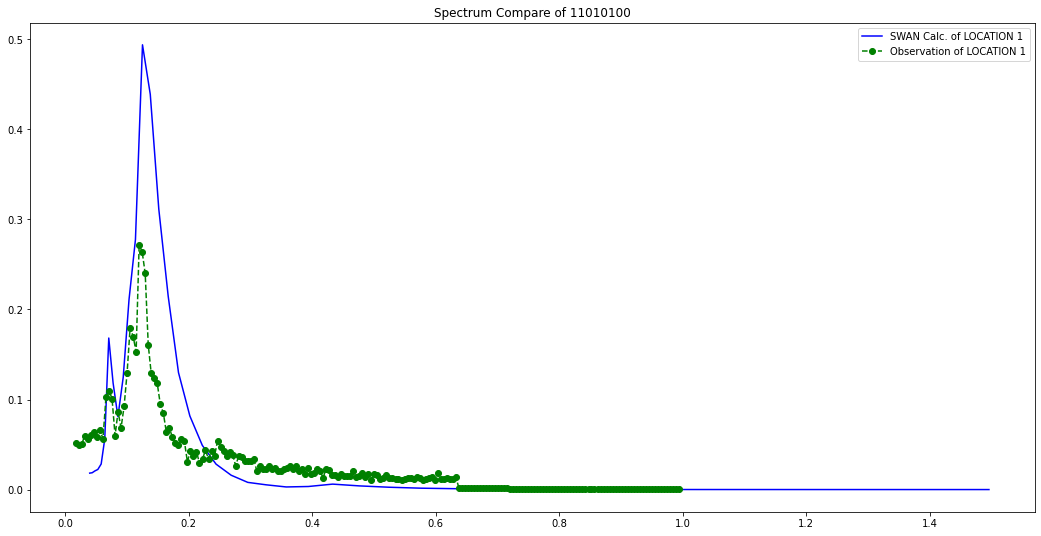

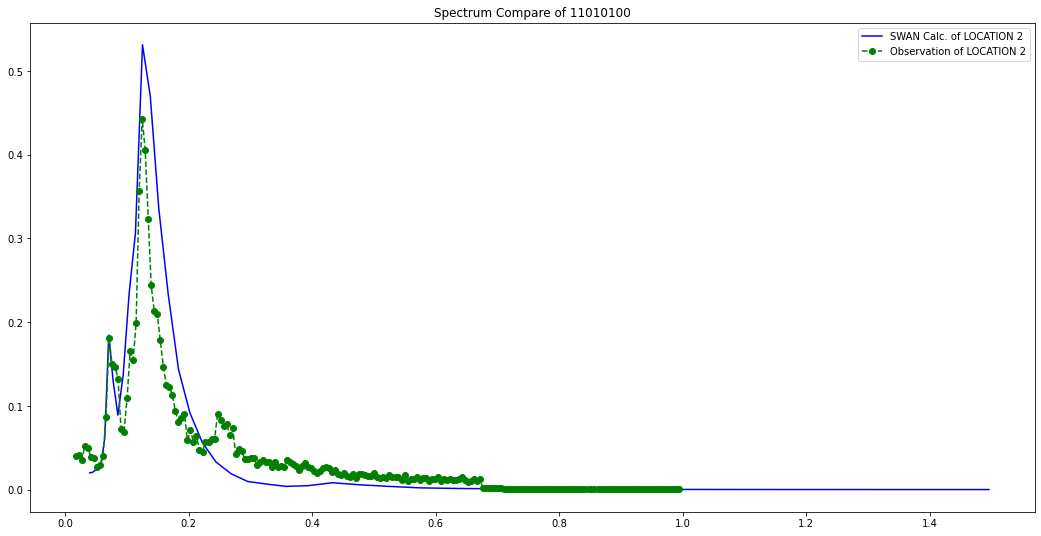

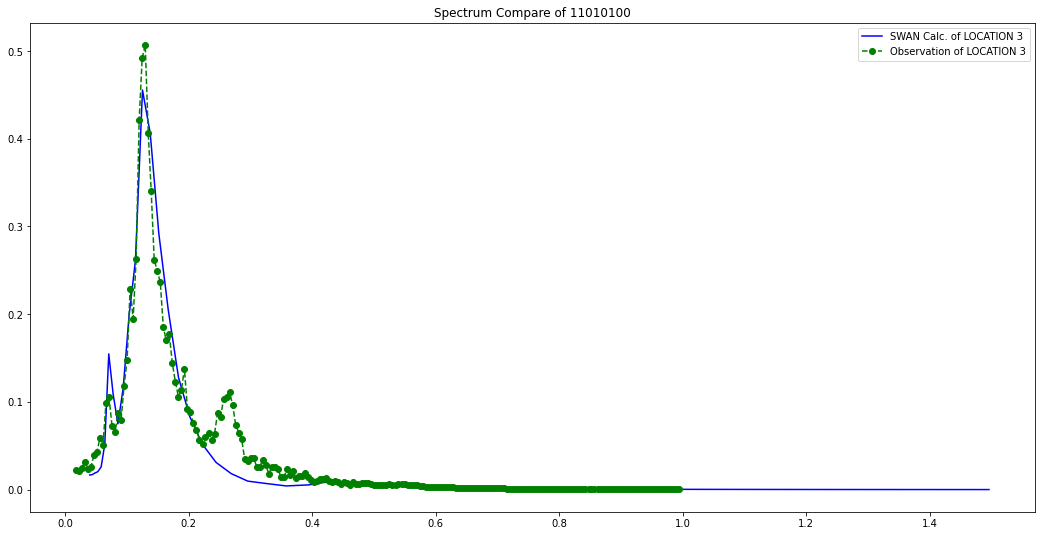

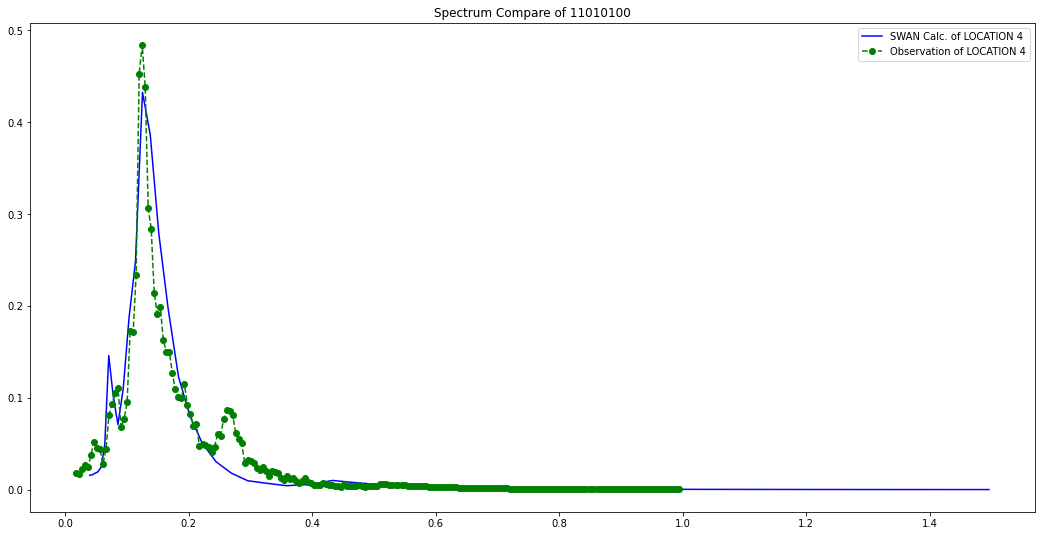

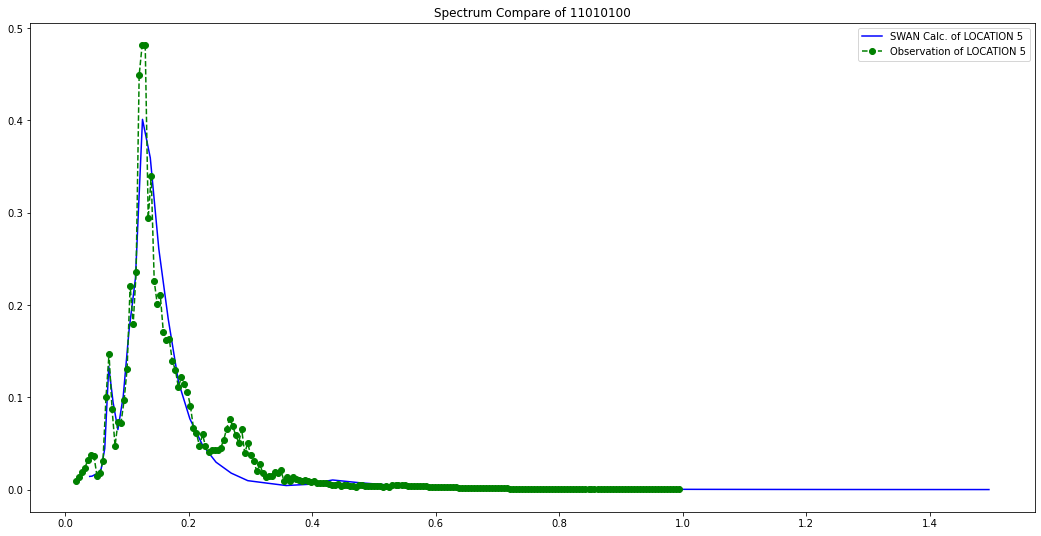

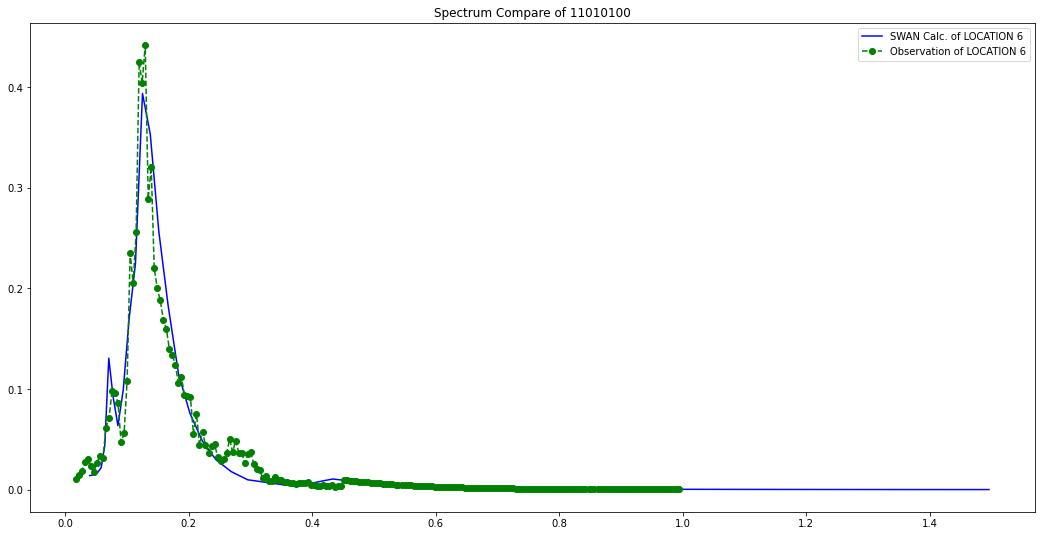

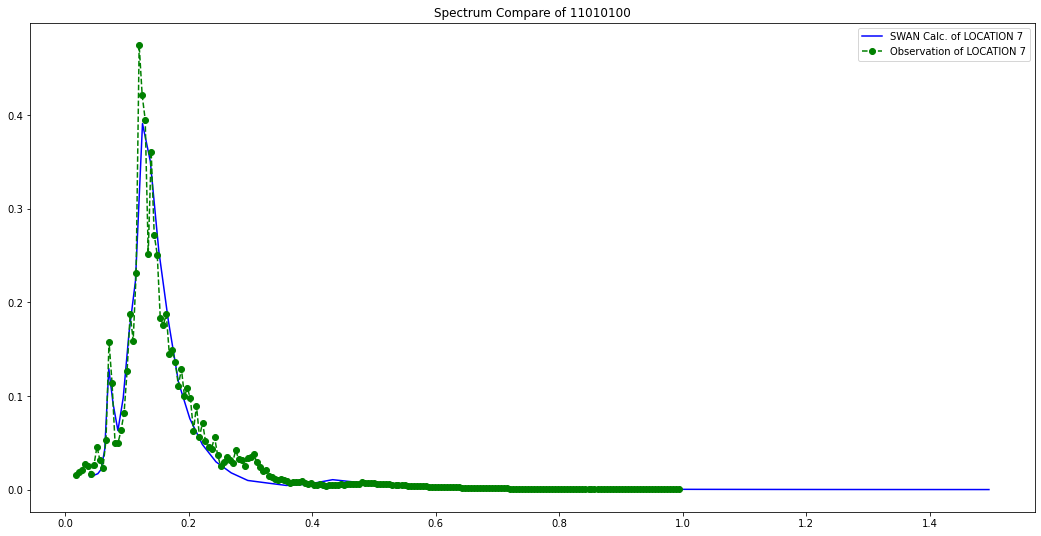

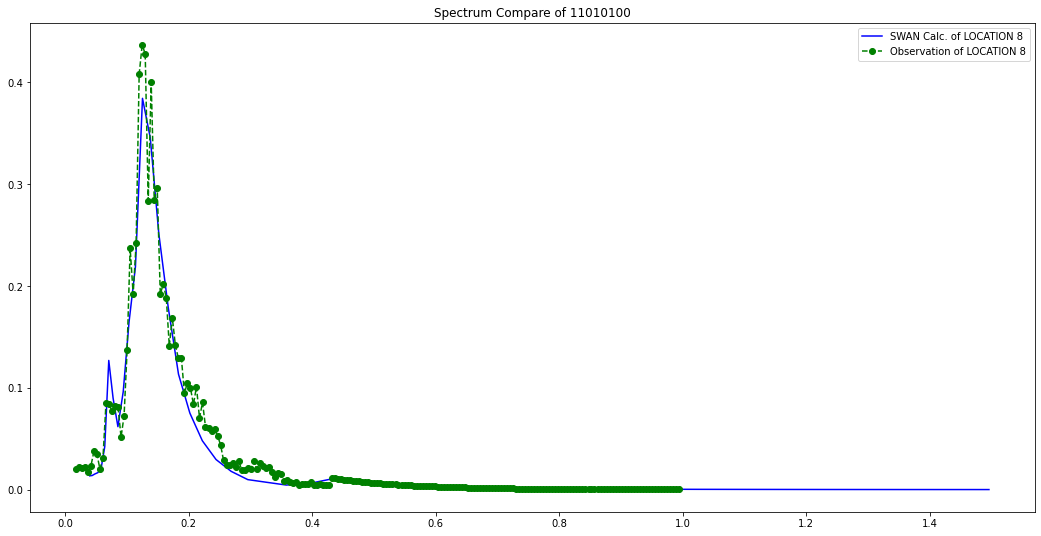

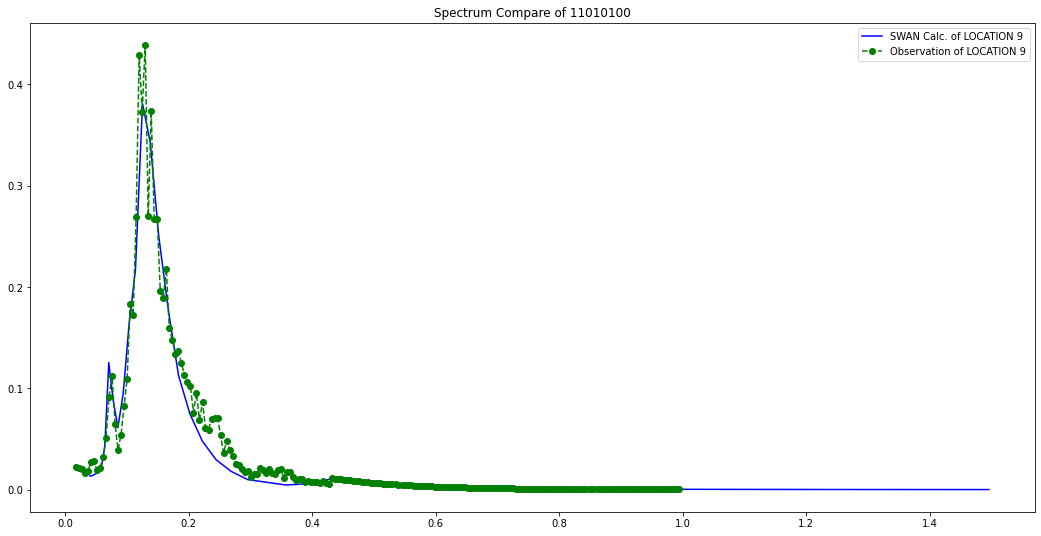

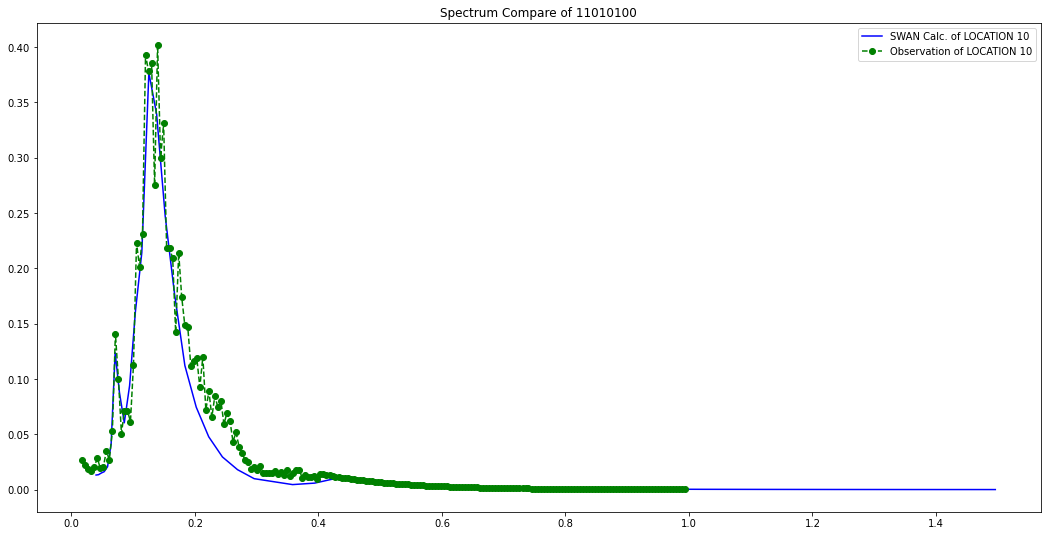

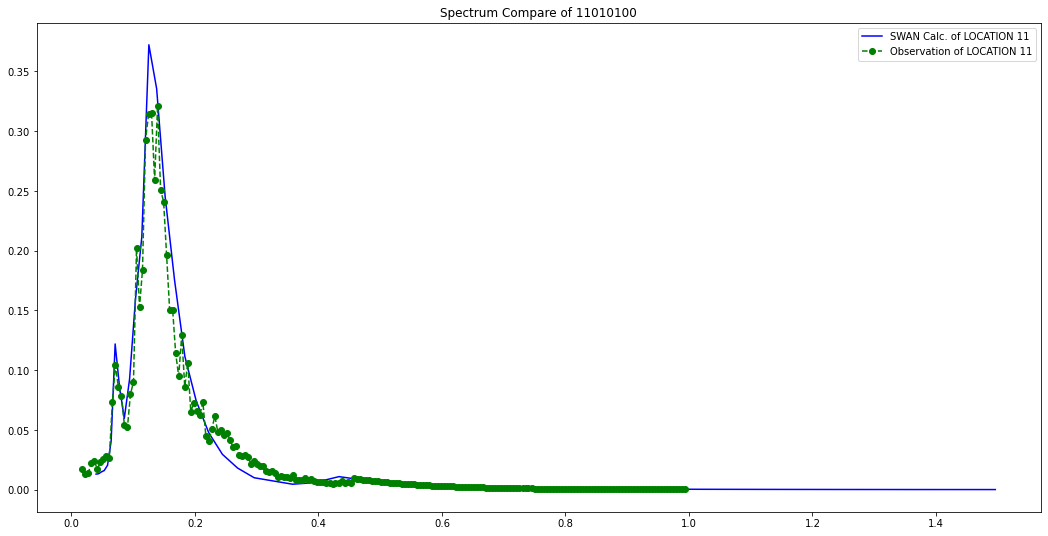

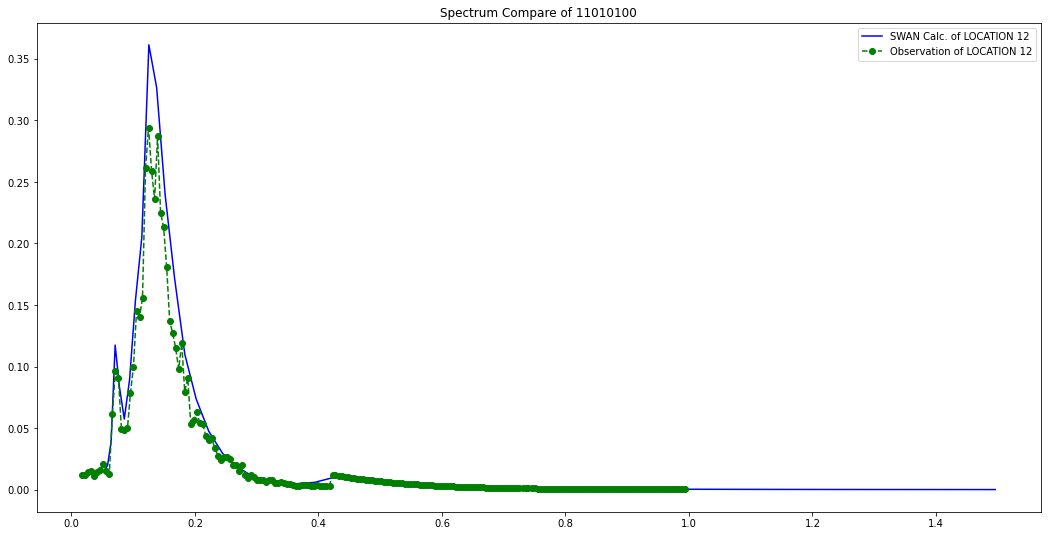

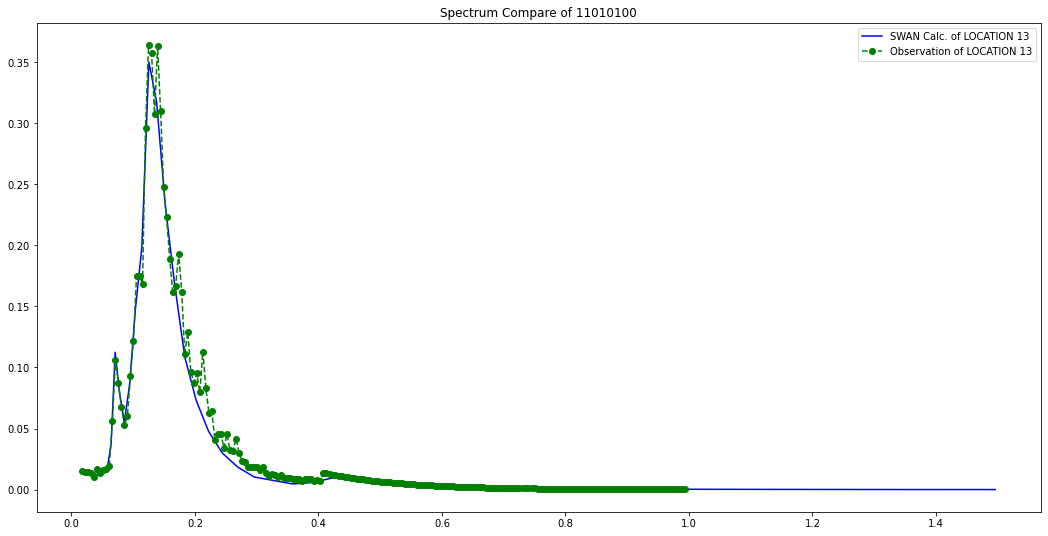

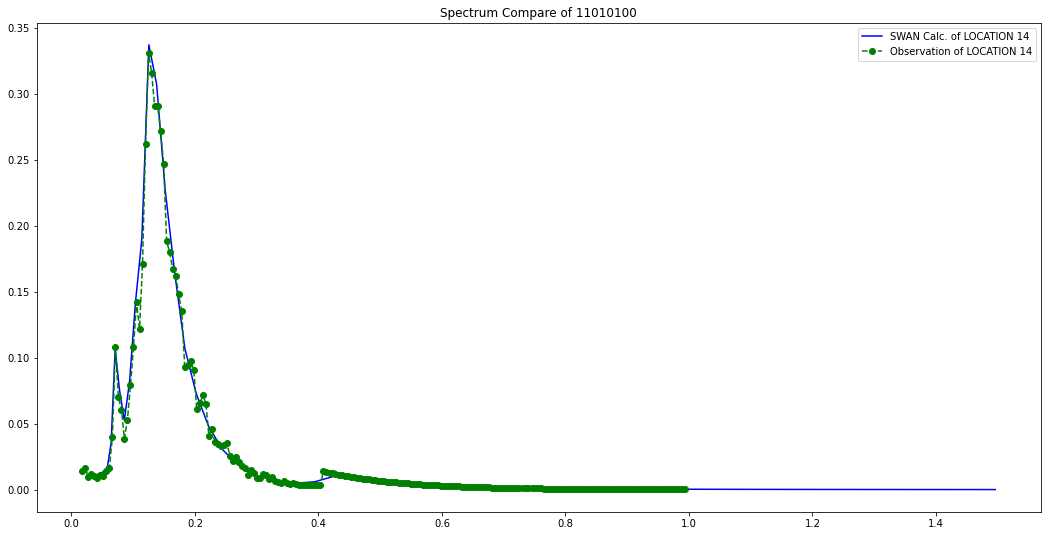

11010400


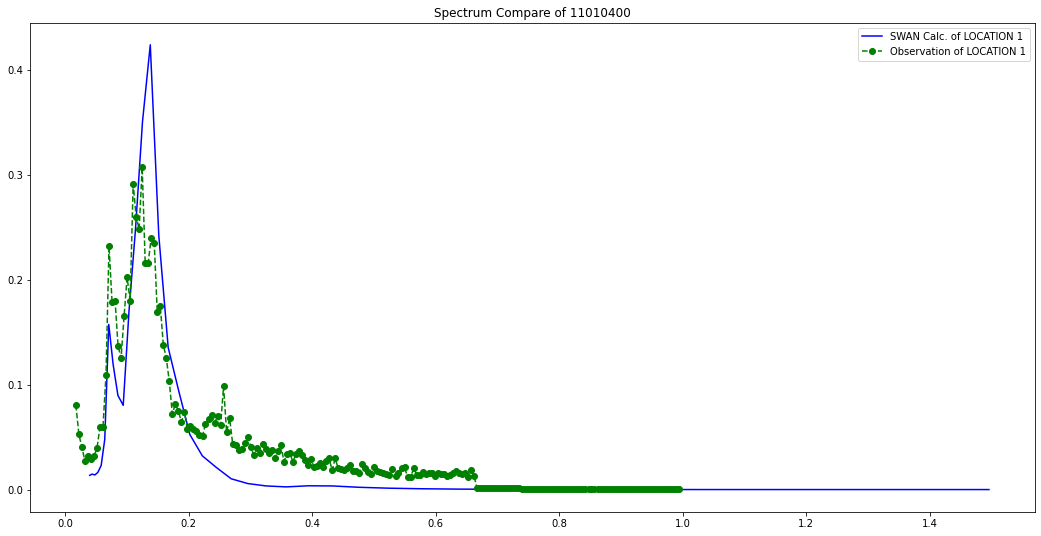

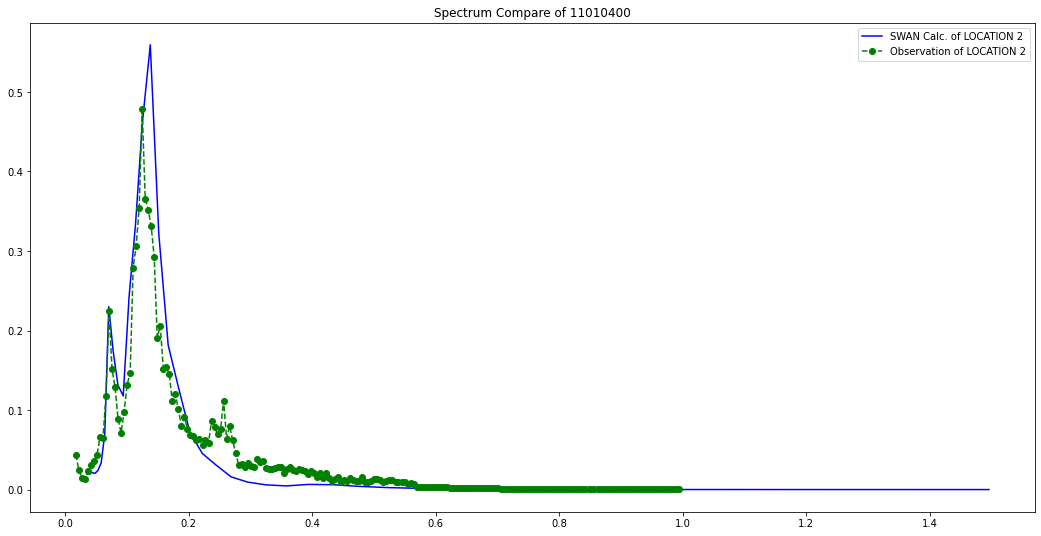

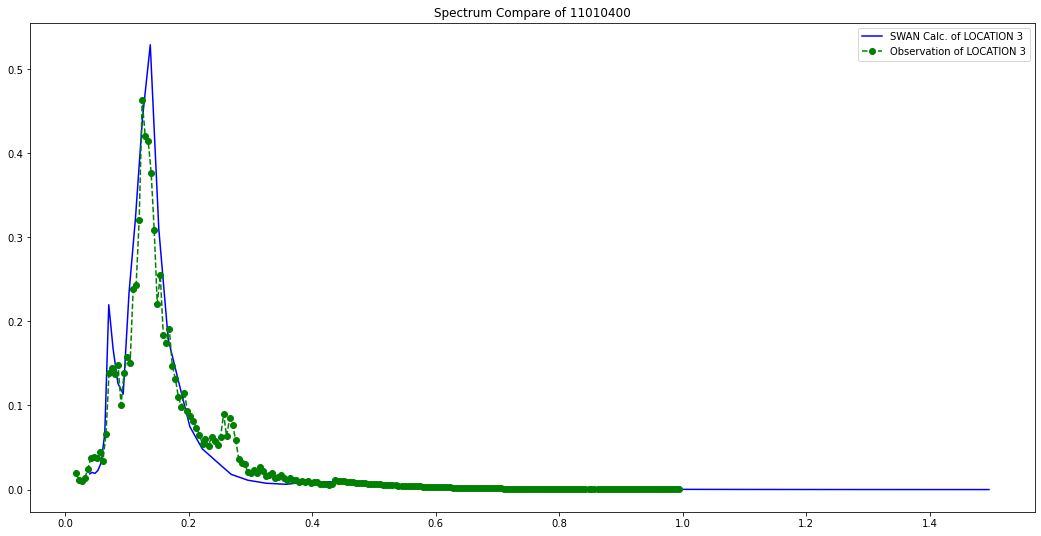

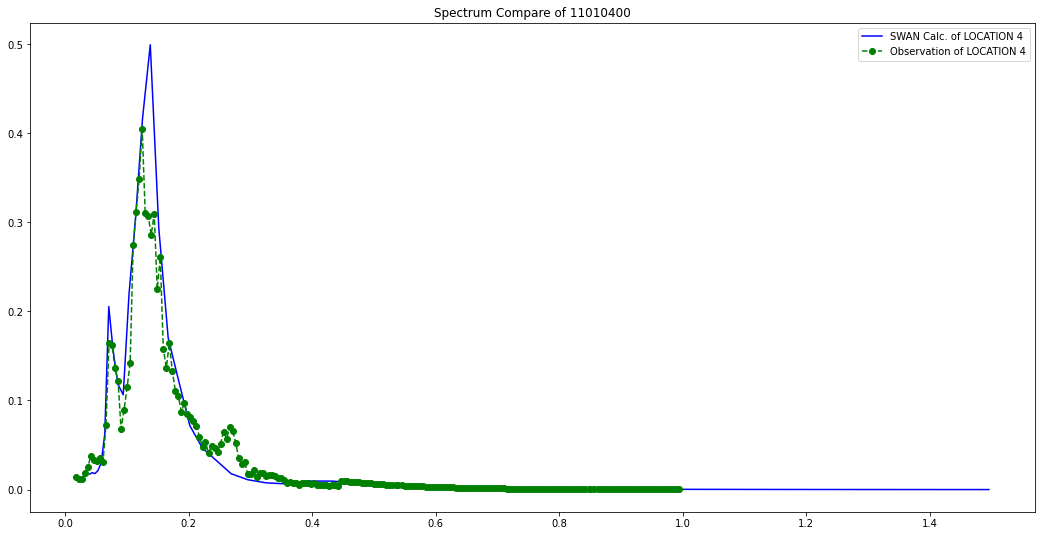

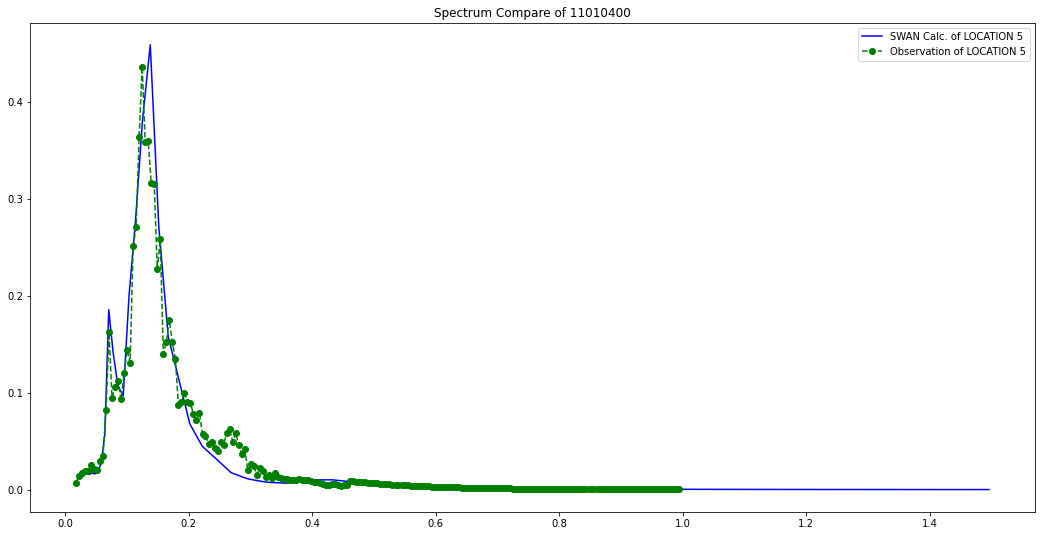

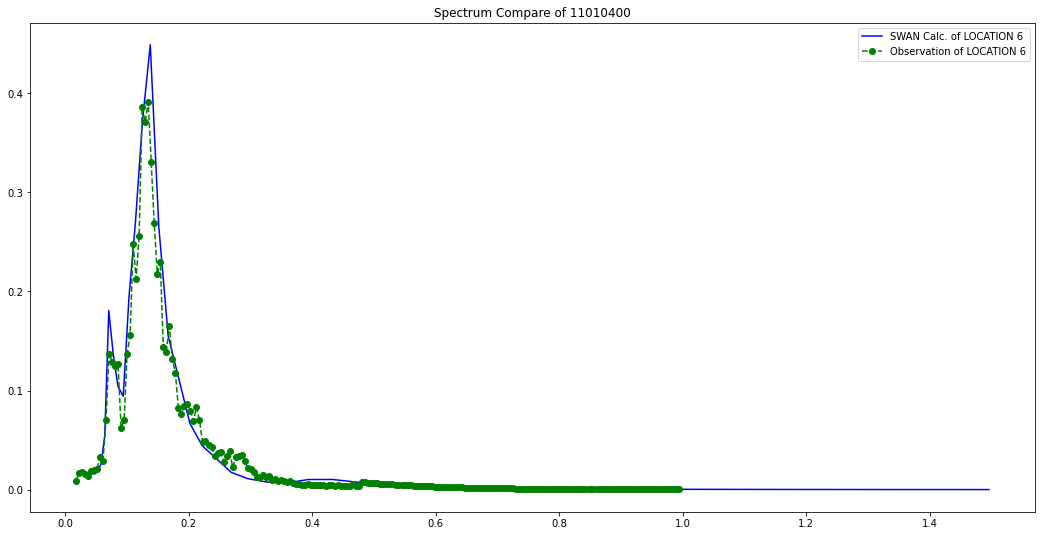

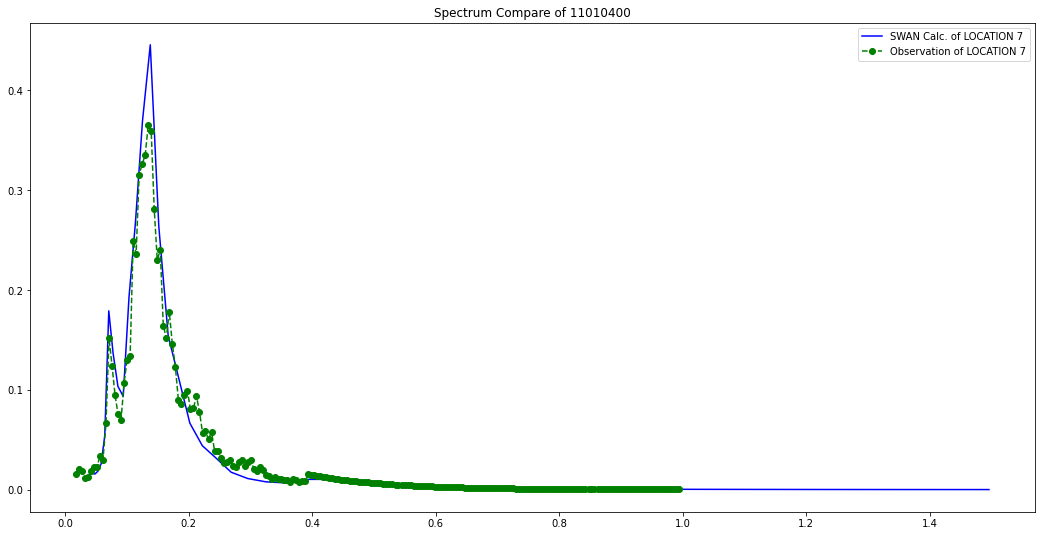

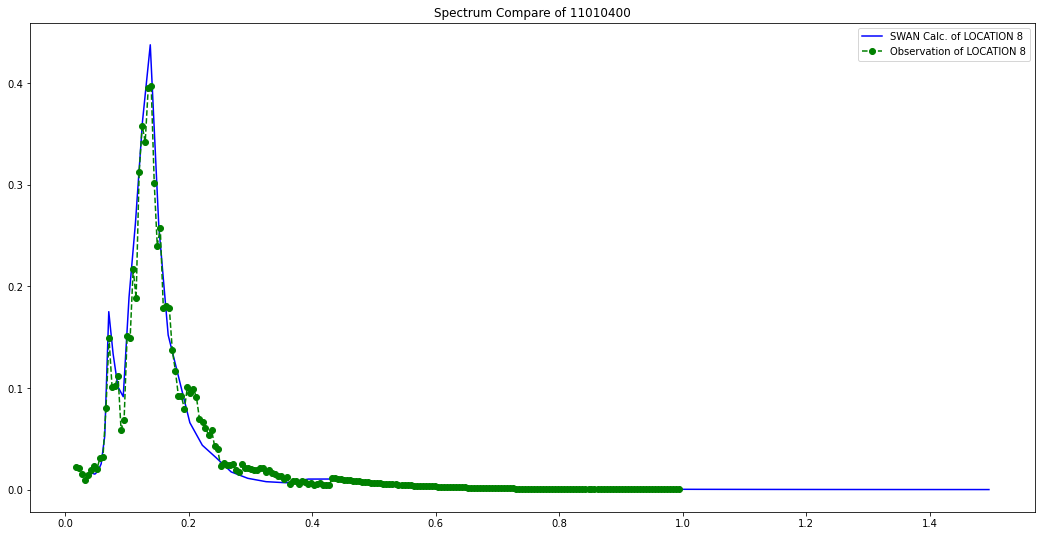

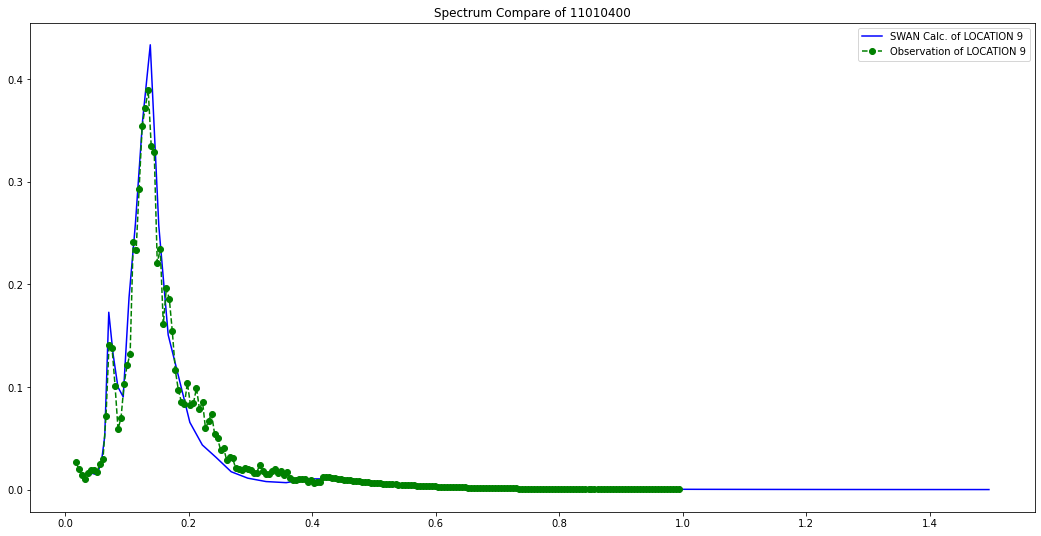

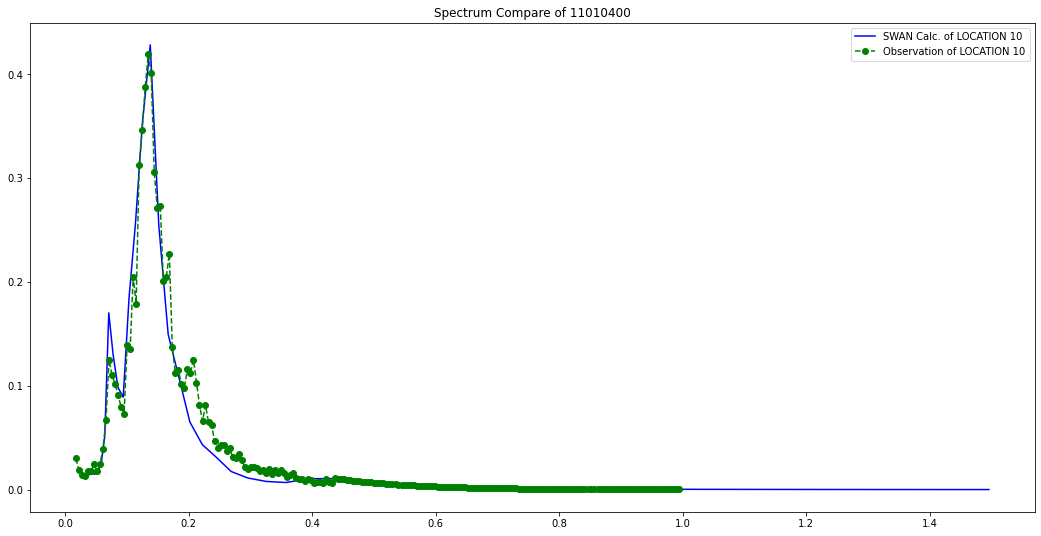

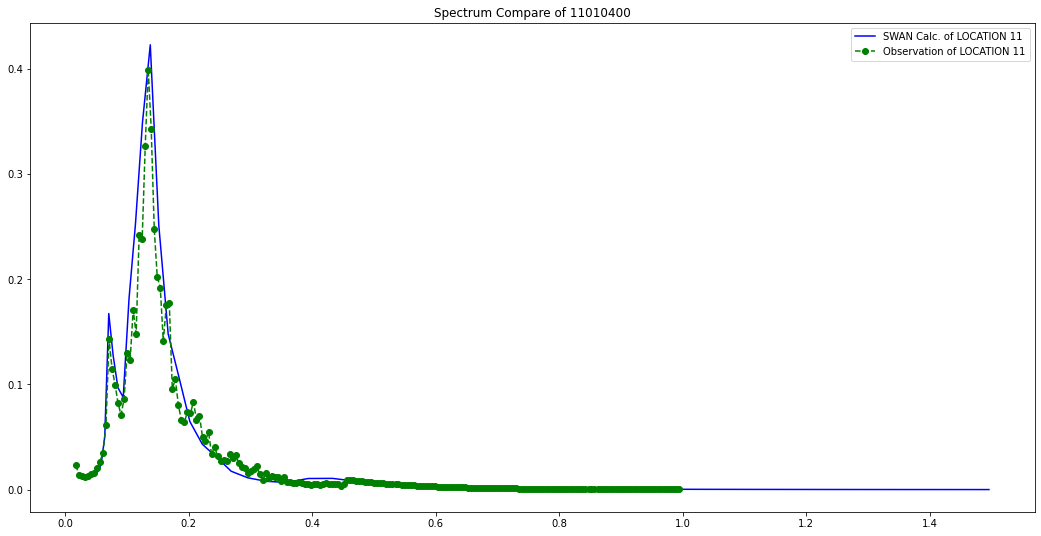

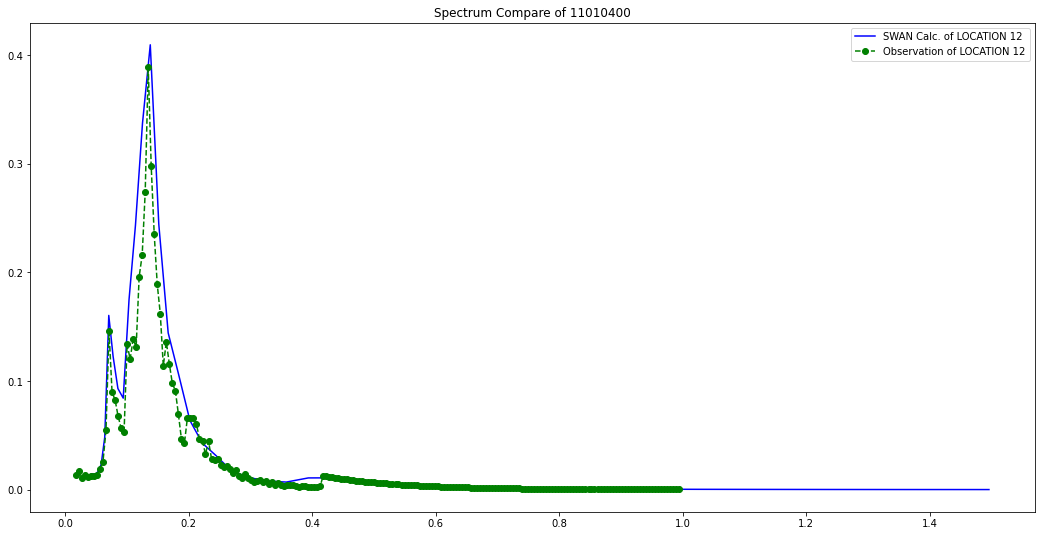

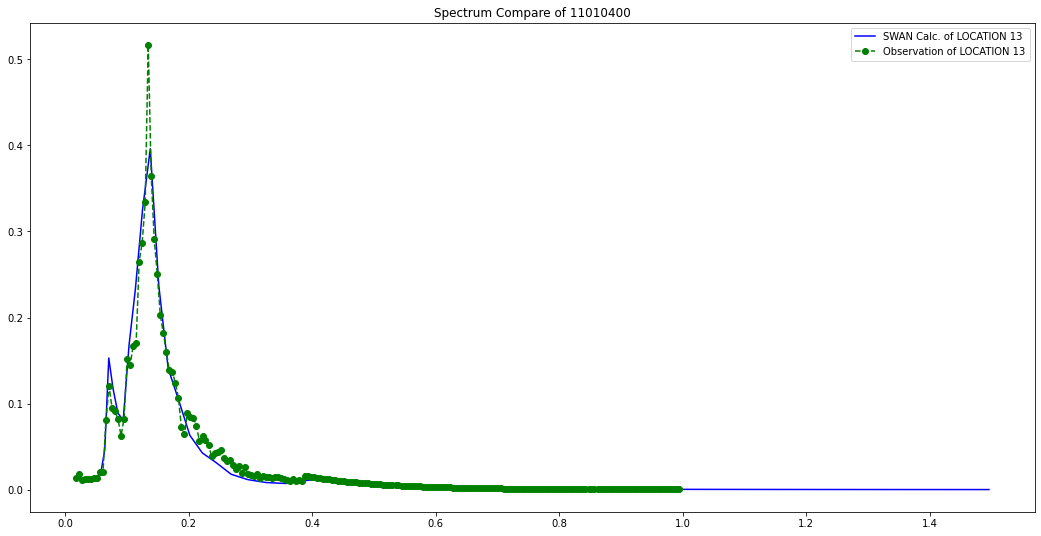

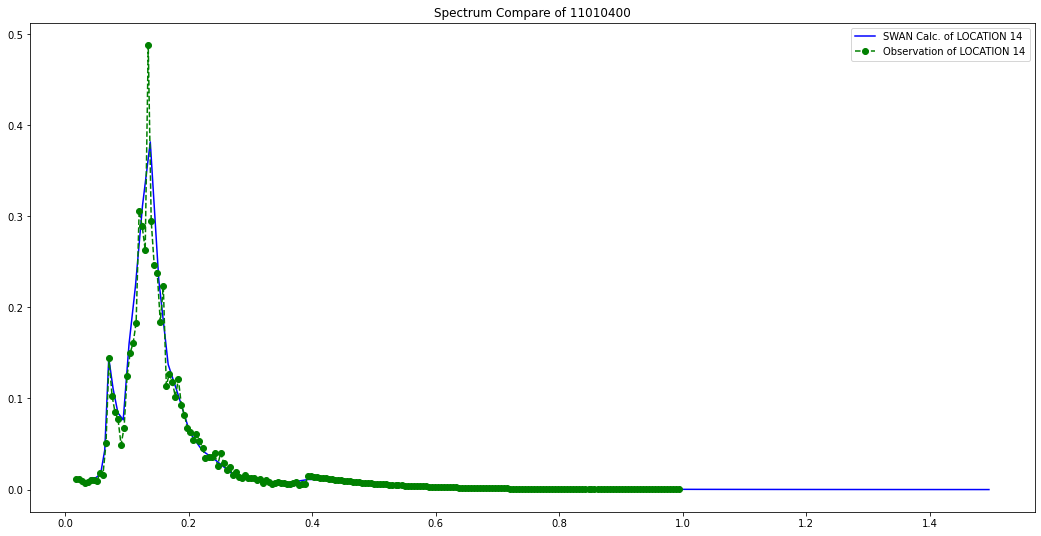

In [40]:
for fnum in range(range_value):
    file_nb = fnum
    C1 = SpC(result_loc, models, file_nb, model_nb)
    print(C1.date_())
    #print(C1.create_SWAN_df())
    #print(C1.create_MEAS_df())
    #C1.create_SWAN_df()
    C1.show_Charts(False)

## Spectrum Compare

This ipynb file compares spectrums of observations and calculated by SWAN in all locations which observed in DUCK94 project.